In [3]:
#Libraries to Import:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


plt.rcParams['figure.figsize'] = [15, 6]

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
import statsmodels.stats.api as ssa
import statsmodels.api as sma
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sma

#pd.options.display.max_rows = None

pd.options.display.max_columns = None

pd.options.display.float_format = '{:0.6f}'.format

In [5]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.shape

(545, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4766729.247706,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1870439.615657,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1750000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3430000.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4340000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5740000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,13300000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Performing EDA

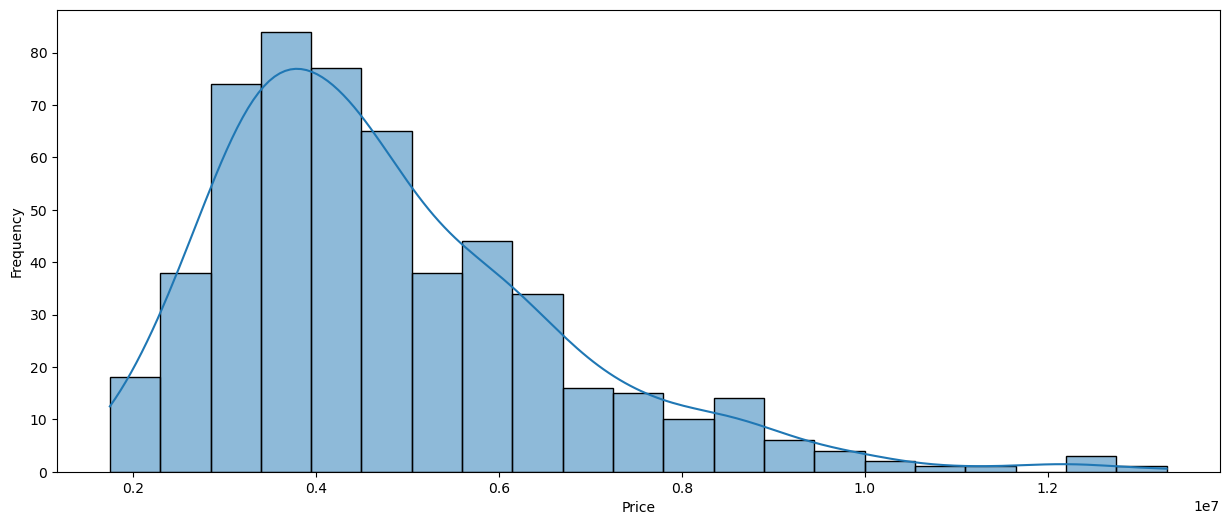

In [11]:
sns.histplot(df['price'],kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Most of the house price are in the price range between 20,00,000 to 70,00,000

Some of the outliers are above 1 crore which is at the right tail

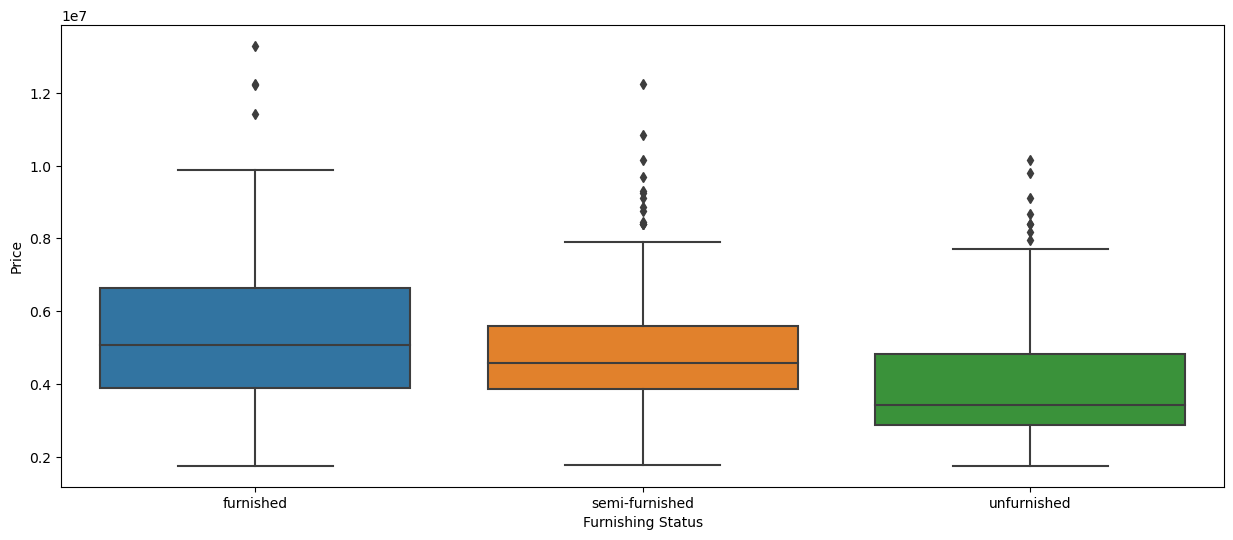

In [12]:
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

50% of the furnished house prices are between 40 lakhs and 65 lakhs.
50% of the semi-furnished house prices are between 40 lakhs and 50 lakhs.
50% of the unfurnished house prices are between 30 lakhs and 45 lakhs.

Most of the extreme outliers are seen in semi_furnished.

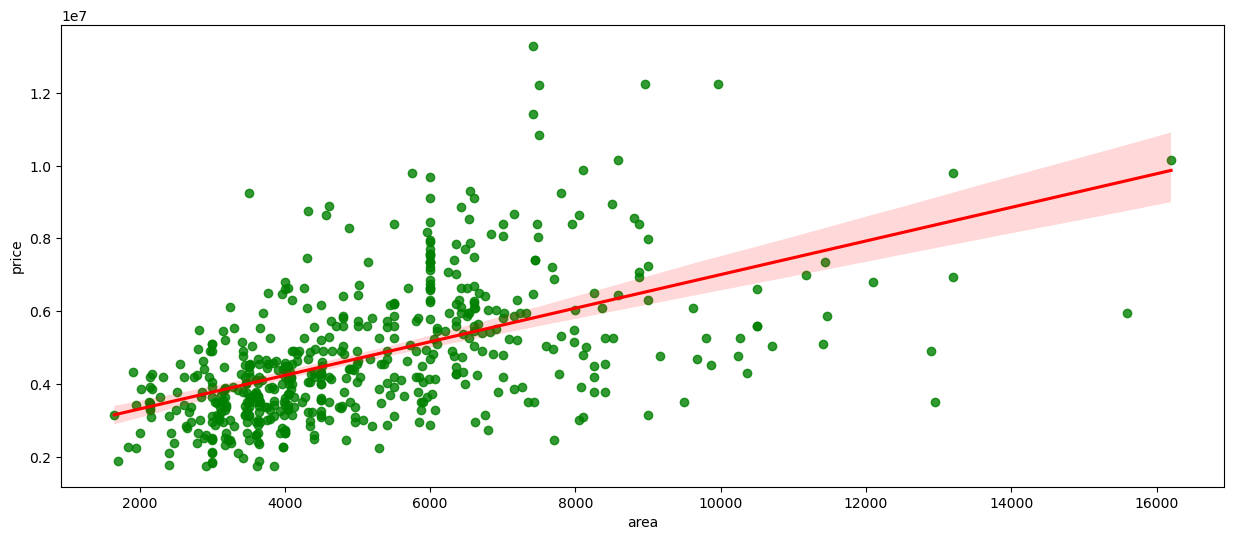

In [13]:
sns.regplot(data=df,x='area', y='price', scatter=True, color='green', line_kws={"color": "red"})
plt.show()

Here as the 
area increases the price also increases. So we assume there is a relation between area and price

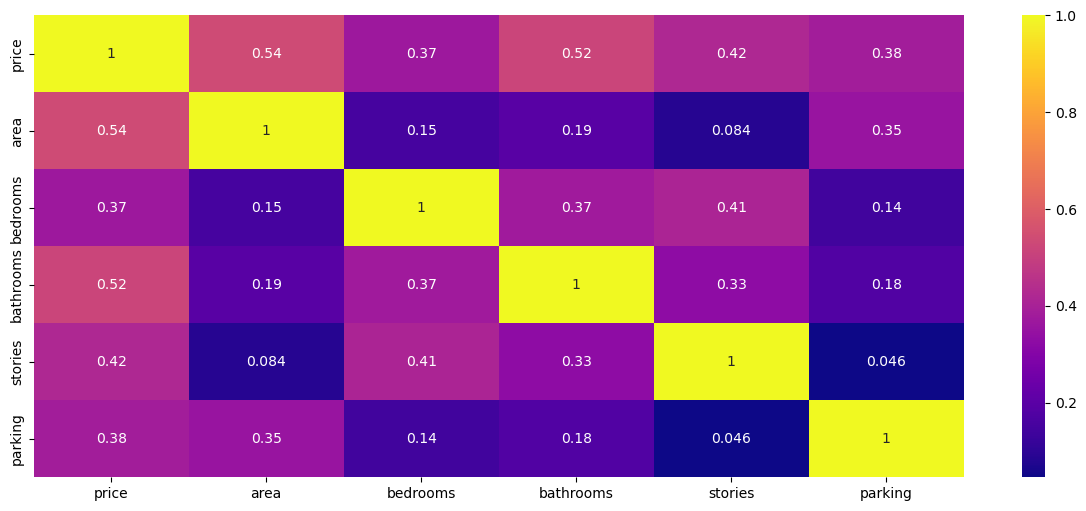

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

There is normal correlation among price, area and bathrooms.

Other have less correlation

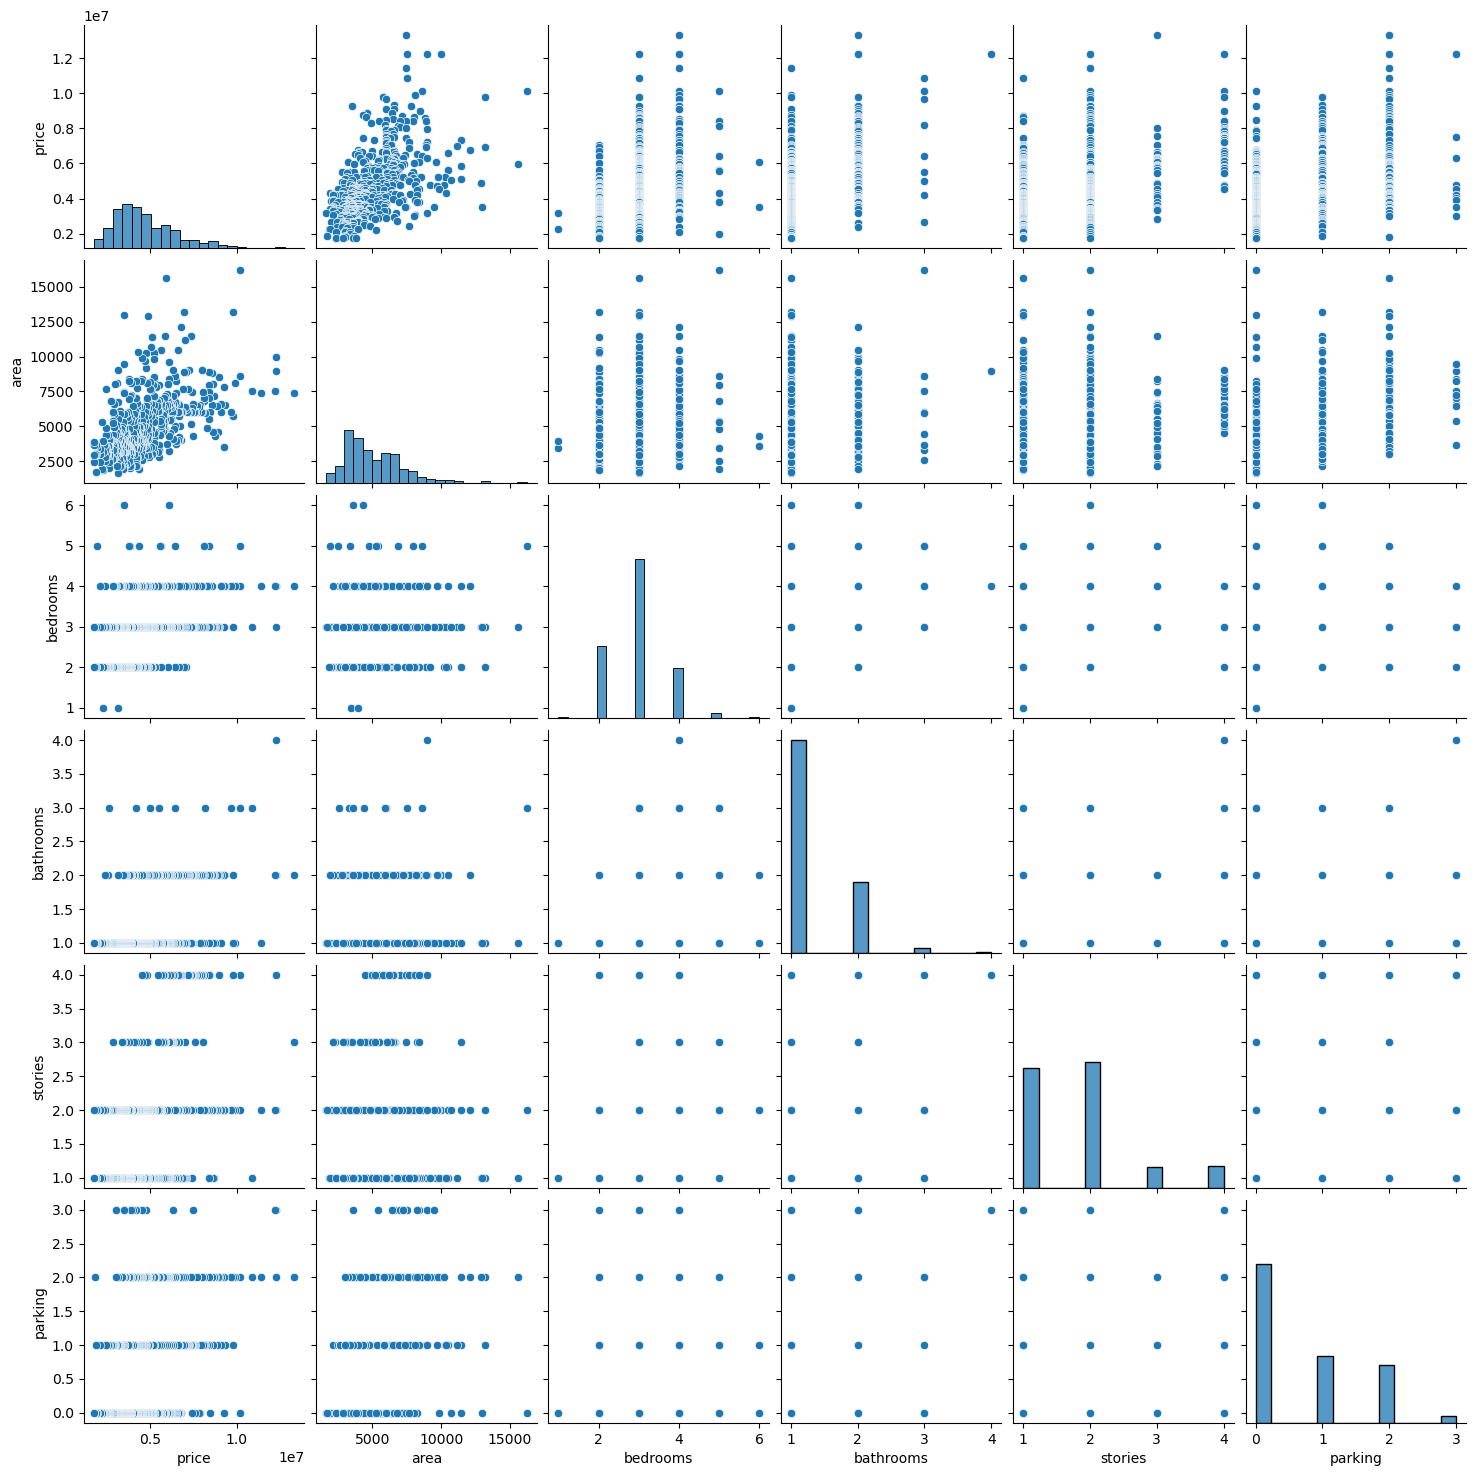

In [15]:
sns.pairplot(df)
plt.show()

# Data Cleaning and Preparation

In [16]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(include=np.number)

In [17]:
print(df_num.shape)
print(df_cat.shape)

(545, 6)
(545, 7)


In [18]:
dummy = pd.get_dummies(df_cat.drop(['furnishingstatus'], axis=1), drop_first=True)


In [19]:
dummy

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [20]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
oe = OrdinalEncoder()
dummy['furnishingstatus_encoded'] = oe.fit_transform(df_cat[['furnishingstatus']])


In [23]:
dummy

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_encoded
0,1,0,0,0,1,1,0.000000
1,1,0,0,0,1,0,0.000000
2,1,0,1,0,0,1,1.000000
3,1,0,1,0,1,1,0.000000
4,1,1,1,0,1,0,0.000000
...,...,...,...,...,...,...,...
540,1,0,1,0,0,0,2.000000
541,0,0,0,0,0,0,1.000000
542,1,0,0,0,0,0,2.000000
543,0,0,0,0,0,0,0.000000


In [24]:
df_num

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [25]:
df_final=pd.concat([df_num,dummy],axis=1)

In [26]:
df_final

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_encoded
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0.000000
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0.000000
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1.000000
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0.000000
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,2.000000
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1.000000
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,2.000000
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0.000000



# Base Model

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [28]:

X = df_final.drop('price',axis=1)

y = df_final['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)

lr = LinearRegression()

lr_bm=lr.fit(X_train,y_train)

pred_test = lr_bm.predict(X_test)

pred_train = lr_bm.predict(X_train)

mse = np.sqrt(mean_squared_error(y_true=y_test,y_pred=pred_test))

r2Score_test = r2_score(y_true=y_test,y_pred=pred_test)

r2Score_train = r2_score(y_true=y_train,y_pred=pred_train)

accuracy = lr.score(X_train,y_train)*100

print('r2_score_test : ',r2Score_test,'\n')

print('r2_score_train : ',r2Score_train,'\n')

print('RMSE : ',mse,'\n')

print('Accuarcy of the test result',accuracy )

r2_score_test :  0.6728084275060378 

r2_score_train :  0.6789071362424812 

RMSE :  1133383.4668633945 

Accuarcy of the test result 67.89071362424812


# Building the multiple linear regression model using OLS Method

In [29]:


# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
temp_X = sma.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train,X_test,y_train,y_test = train_test_split(temp_X, y, random_state=1, test_size = 0.2)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_inter', X_train.shape)
print('y_train_inter', y_train.shape)

# print dimension of test set
print('X_test_inter', X_test.shape)
print('y_test_inter', y_test.shape)

X_train_inter (436, 13)
y_train_inter (436,)
X_test_inter (109, 13)
y_test_inter (109,)


In [30]:
MLR_model = sma.OLS(y_train, X_train).fit()

print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     80.19
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          6.66e-101
Time:                        19:35:10   Log-Likelihood:                -6644.9
No. Observations:                 436   AIC:                         1.332e+04
Df Residuals:                     423   BIC:                         1.337e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The Durbin-Watson test is used to check the autocorrelation between the residuals.
between 2 and 4: negative autocorrelation

The Jarque-Bera test is used to check the normality of the residuals.
the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.


The 'Cond. No' (1.5e+05) represents the Condition Number (CN) which is used to check the multicollinearity
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is severe multicollinearity in the data

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mm=MinMaxScaler()
df_scaled_mm=mm.fit_transform(df_num)
df_scaled=pd.DataFrame(df_scaled_mm,columns=df_num.columns.to_list())

In [33]:
df_sf_BM1=pd.concat([dummy,df_scaled],axis=1) #scaled_final
df_sf_BM1.head()

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_encoded,price,area,bedrooms,bathrooms,stories,parking
0,1,0,0,0,1,1,0.000000,1.000000,0.396564,0.600000,0.333333,0.666667,0.666667
1,1,0,0,0,1,0,0.000000,0.909091,0.502405,0.600000,1.000000,1.000000,1.000000
2,1,0,1,0,0,1,1.000000,0.909091,0.571134,0.400000,0.333333,0.333333,0.666667
3,1,0,1,0,1,1,0.000000,0.906061,0.402062,0.600000,0.333333,0.333333,1.000000
4,1,1,1,0,1,0,0.000000,0.836364,0.396564,0.600000,0.000000,0.333333,0.666667


In [34]:

X = df_sf_BM1.drop('price',axis=1)

y = df_sf_BM1['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)

lr = LinearRegression()

lr_bm=lr.fit(X_train,y_train)

pred_test = lr_bm.predict(X_test)

pred_train = lr_bm.predict(X_train)

mse = np.sqrt(mean_squared_error(y_true=y_test,y_pred=pred_test))

r2Score_test = r2_score(y_true=y_test,y_pred=pred_test)

r2Score_train = r2_score(y_true=y_train,y_pred=pred_train)

accuracy = lr.score(X_train,y_train)*100

print('r2_score_test : ',r2Score_test,'\n')

print('r2_score_train : ',r2Score_train,'\n')

print('RMSE : ',mse,'\n')

print('Accuarcy of the test result',accuracy )

r2_score_test :  0.6728084275060375 

r2_score_train :  0.6789071362424812 

RMSE :  0.09812843868947144 

Accuarcy of the test result 67.89071362424812


# OLS Transform

In [35]:
X = df_sf_BM1.drop('price',axis=1)

y = df_sf_BM1['price']

temp_X = sma.add_constant(X)

X_train,X_test,y_train,y_test = train_test_split(temp_X, y, random_state=1, test_size = 0.2)

In [36]:
model_sqrt = sma.OLS(np.sqrt(y_train), X_train).fit() #sqr root

model_cbrt = sma.OLS(np.cbrt(y_train), X_train).fit() #cube root transformation

model_log = sma.OLS(np.log(y_train), X_train).fit() #log trans

model_yojh = sma.OLS(stats.yeojohnson(y_train)[0], X_train).fit() #ytojohnson



In [37]:
transf_score = pd.DataFrame(columns=['Transformation',
                                     'R_Squared',
                                      'Adj Rsquared' ]
                                  )


def update_transformation (name,
                           model
                           ):

    # assign 'comp_perf' as global variable
    global transf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    transf_score = transf_score.append({'Transformation'    : name,
                                        'R_Squared'         : model.rsquared,
                                        'Adj Rsquared'    : model.rsquared_adj
                                    },
                                   ignore_index = True)

In [38]:
update_transformation(name = "Square Root", model = model_sqrt)
update_transformation(name = "Cube Root", model = model_cbrt)
update_transformation(name = "Yeo Johnson", model = model_yojh)

In [39]:
transf_score

,Transformation,R_Squared,Adj Rsquared
0,Square Root,0.691643,0.682895
1,Cube Root,0.648525,0.638554
2,Yeo Johnson,0.704035,0.695638
